# Notebook 1 Outline: 01_part1_linreg_1feature.ipynb

## Linear Regression - Stellar Luminosity vs Mass

##  SetUp

In [ ]:

# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/12.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.4 MB ? eta -:--:--
    --------------------------------------- 0.3/12.4 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.4 MB 920.4 kB/s eta 0:00:13
   -- ------------------------------------- 0.8/12.4 MB 1.1 MB/s eta 0:00:11
   --- ------------------------------------ 1.0/12.4 MB 1.2 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/12.4 MB 1.4 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/12.4 MB 1.2 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.4 MB 1.2 MB/s eta 0:00:10
   ------ --------------------------------- 2.1/12.4 MB 1.2 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/12.4 MB 1.2 MB/s eta 0:00:09
   -------- ------------------------------- 2.6/12.4 MB 1.2 MB/s eta 0:00:09
   ---------- -----------------

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

## Dataset Definition

In [ ]:
# Stellar Mass (in solar masses)
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])

# Stellar Luminosity (in solar luminosities)
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

n = len(M)  # number of samples

## Dataset Visualization

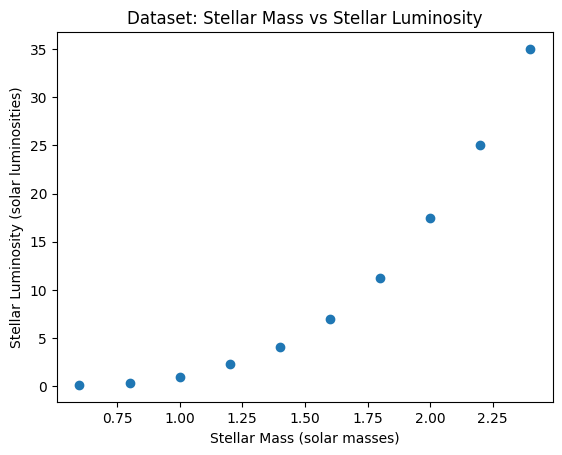

In [ ]:
plt.figure()
plt.scatter(M, L)
plt.xlabel("Stellar Mass (solar masses)")
plt.ylabel("Stellar Luminosity (solar luminosities)")
plt.title("Dataset: Stellar Mass vs Stellar Luminosity")
plt.show()


# Model Definition

**Hypothesis function:**
$$
f_{w,b}(M^{(i)}) =  L̂ = w * M + b
$$

In [ ]:
def predict(M, w, b):
    return w * M + b

w_test = 0.0
b_test = 0.0
L_hat_test = predict(M, w_test, b_test)
print("First 5 predictions with w=0, b=0:", L_hat_test[:5])

First 5 predictions with w=0, b=0: [0. 0. 0. 0. 0.]


## Cost Function
**Mean Squared Error:**
$$
J(w,b) = \frac{1}{2n} \sum_{i=1}^{n} \big( f_{w,b}(M^{(i)}) - L^{(i)} \big)^2
$$


In [ ]:

def compute_cost(M, L, w, b):
    n = M.shape[0]
    L_hat = w * M + b  # f_{w,b}(M)
    errors = L_hat - L
    cost = (1 / (2 * n)) * np.sum(errors ** 2)
    return cost

print("Cost with w=0, b=0:", compute_cost(M, L, w_test, b_test))

Cost with w=0, b=0: 117.69675000000001


## Cost Surface Visualization

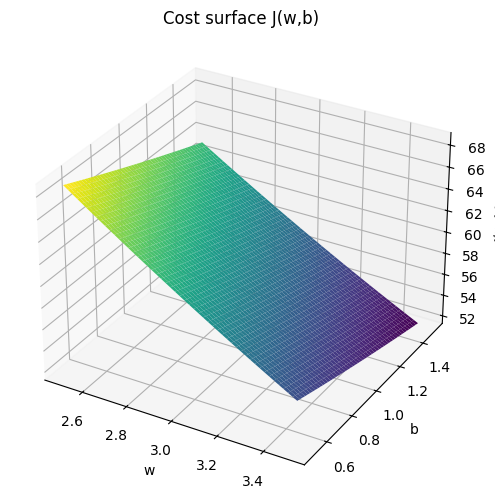

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

w_values = np.linspace(2.5, 3.5, 1000)
b_values = np.linspace(0.5, 1.5, 1000)

W, B = np.meshgrid(w_values, b_values)
J_vals = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_vals[i, j] = compute_cost(M, L, W[i, j], B[i, j])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w,b)")
ax.set_title("Cost surface J(w,b)")
plt.show()

##  Gradient Computation
**Analytical derivatives:**

$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big) x^{(i)}
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)
$$


In [ ]:
def compute_gradients(M, L, w, b):
    m = M.shape[0]
    L_hat = w * M + b  # f_{w,b}(M)
    errors = L_hat - L


    dj_dw = (1 / m) * np.sum(errors * M)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(M, L, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)

Gradients at w=0, b=0: -21.523 -10.36


## Gradient Descent Implementation
**Update rule:**

Given a **learning rate** $\alpha > 0$, we update:

$$
w := w - \alpha \frac{\partial J}{\partial w}, \qquad
b := b - \alpha \frac{\partial J}{\partial b}
$$


### Gradient descent (non-vectorized)

In [ ]:
def gradient_descent(M_list, L_list, w_init, b_init, alpha, num_iterations):
    """Run gradient descent using explicit loops for gradients and cost."""
    w = w_init
    b = b_init
    history_iterations = []
    history_costs = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M_list, L_list, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M_list, L_list, w, b)
        history_iterations.append(i)
        history_costs.append(cost)

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history_iterations, history_costs

alpha = 0.01
num_iterations = 1000

w_init = 1.0
b_init = 1.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: w= 1.1744, b= 1.0786, cost= 85.5063
Iteration  100: w= 6.6737, b= 1.8537, cost= 32.5834
Iteration  200: w= 7.8233, b= 0.2335, cost= 28.6173
Iteration  300: w= 8.7582, b=-1.3072, cost= 25.3688
Iteration  400: w= 9.6053, b=-2.7106, cost= 22.6809
Iteration  500: w=10.3758, b=-3.9872, cost= 20.4569
Iteration  600: w=11.0766, b=-5.1484, cost= 18.6168
Iteration  700: w=11.7141, b=-6.2047, cost= 17.0943
Iteration  800: w=12.2940, b=-7.1655, cost= 15.8345
Iteration  900: w=12.8215, b=-8.0394, cost= 14.7922

Learned parameters:
w = 13.296745736349799
b = -8.826839547227575


### Gradient descent (vectorized)

In [ ]:
def gradient_descent(M, L, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M, L, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history

alpha = 0.01
num_iterations = 2000

w_init = 0.0
b_init = 0.0

w_learned, b_learned, history = gradient_descent(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)


Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration  200: w= 7.9674, b=-0.0073, cost= 28.0913
Iteration  400: w= 9.7253, b=-2.9093, cost= 22.3208
Iteration  600: w=11.1759, b=-5.3129, cost= 18.3703
Iteration  800: w=12.3762, b=-7.3015, cost= 15.6658
Iteration 1000: w=13.3693, b=-8.9470, cost= 13.8142
Iteration 1200: w=14.1910, b=-10.3085, cost= 12.5466
Iteration 1400: w=14.8709, b=-11.4350, cost= 11.6788
Iteration 1600: w=15.4334, b=-12.3670, cost= 11.0847
Iteration 1800: w=15.8989, b=-13.1383, cost= 10.6780

Learned parameters:
w = 16.2822484076734
b = -13.77345340049044


## Convergence

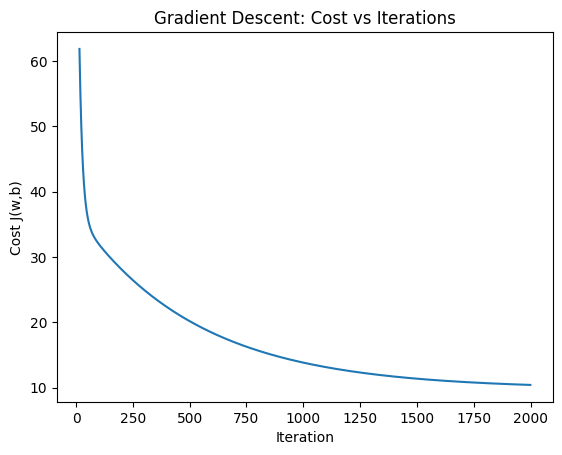

In [ ]:
iterations = [it for it, c in history]
costs = [c for it, c in history]

plt.figure()
plt.plot(iterations[15:], costs[15:])  # skip the first points
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

The convergence is initially fast, with a steep reduction in cost during the first iterations. As the algorithm approaches the minimum, the updates become smaller and the curve flattens, showing slower but stable convergence. The smooth and monotonic decrease of the loss indicates that the chosen learning rate ensures stable optimization without oscillations or divergence.

## Experiments

In [ ]:
# Run gradient descent for multiple learning rates and report final w, b, and loss
learning_rates = [1e-3, 1e-2, 5e-2]
num_iters = 2000
w0, b0 = 0.0, 0.0

results = []
for alpha in learning_rates:
    w, b = w0, b0
    for _ in range(num_iters):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
    loss = compute_cost(M, L, w, b)
    results.append((alpha, w, b, loss))

for alpha, w, b, loss in results:
    print(f"alpha={alpha:.3g} -> w={w:.6f}, b={b:.6f}, loss={loss:.6f}")

alpha=0.001 -> w=7.956186, b=0.009567, loss=28.129022
alpha=0.01 -> w=16.282248, b=-13.773453, loss=10.400701
alpha=0.05 -> w=18.129375, b=-16.833916, loss=9.795149


## Visualize the Fitted Line

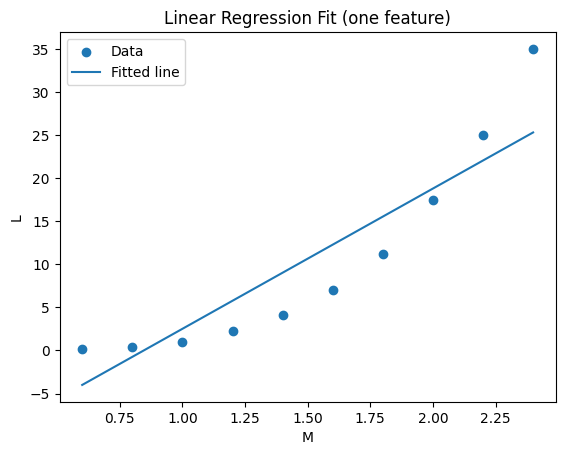

In [ ]:
plt.figure()
plt.scatter(M, L, label="Data")
L_pred = predict(M, w_learned, b_learned)
plt.plot(M, L_pred, label="Fitted line")
plt.xlabel("M")
plt.ylabel("L")
plt.title("Linear Regression Fit (one feature)")
plt.legend()
plt.show()

## Conceptual Questions

- **Astrophysical meaning of w? :**
W is the slope of the mass-luminosity relation. It indicates how much luminosity (in solar units) increases for each increase in solar mass. It is the average rate of change of luminosity with respect to mass over the observed range.

- **Why is a linear model limited here? :**
The actual physical relationship between the mass and luminosity of stars is nonlinear. A linear model does not capture this curvature: it fits well only in a small range and produces biases for low/high masses, in addition to not reflecting the underlying physics.